### Computer Vision and Convolutional Neural Networks

#### Navigating to the right folder

In [210]:
%pwd

'/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial'

In [211]:
%cd /media/pranshumaan/TOSHIBA\ EXT

/media/pranshumaan/TOSHIBA EXT


In [212]:
%cd Dev/
%ls

/media/pranshumaan/TOSHIBA EXT/Dev
data/  Deep_Learning_Pytorch_Udemy_Tutorial/


In [213]:
%cd Deep_Learning_Pytorch_Udemy_Tutorial/

/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial


In [214]:
%pwd

'/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial'

#### Importing dependencies, datasets and setup

In [215]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [216]:
# Set up training data
from torchvision import datasets

train_data = datasets.FashionMNIST(root = "data",
                                   train = True,
                                   download = True,
                                   transform=torchvision.transforms.ToTensor(),
                                   target_transform=None)

test_data = datasets.FashionMNIST(root = "data",
                                   train = False,
                                   download = True,
                                   transform=torchvision.transforms.ToTensor(),
                                   target_transform=None)

In [217]:
len(train_data), len(test_data)

(60000, 10000)

In [218]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [219]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

T-shirt/top


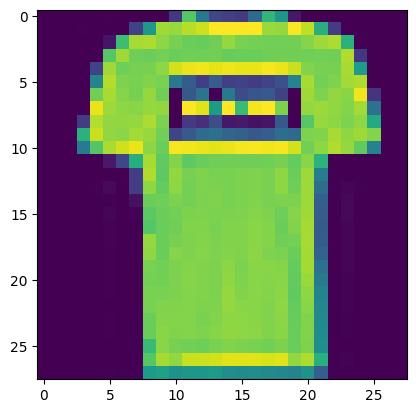

In [220]:
image, label = train_data[1]
plt.imshow(image.squeeze())
print(class_names[label])

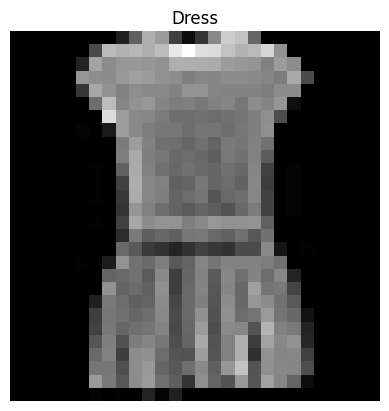

In [221]:
image, label = train_data[3]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);

In [424]:
# Prepare data loader - turns data set into a python iterable
# More specifically, it organizes data into batches of say 32

from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8f068c39d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8f068c3940>)

In [223]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


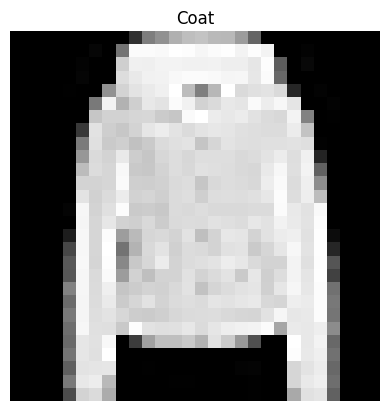

In [224]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

#### Actually building the model

In [225]:
class FashionMNISTModelV2(nn.Module):
    #Model architecture replicates TinyVGG
    def __init__(self,
                 input_shape:int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1), #Hyperparameters
                                          nn.ReLU(),
                                          nn.Conv2d(in_channels=hidden_units,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1),
                                          nn.ReLU(),
                                          nn.MaxPool2d(kernel_size=2)
                                         )
        self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1), #Hyperparameters
                                          nn.ReLU(),
                                          nn.Conv2d(in_channels=hidden_units,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1),
                                          nn.ReLU(),
                                          nn.MaxPool2d(kernel_size=2)
                                         )
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=hidden_units*7*7,
                                                  out_features=output_shape)
                                       )
    def forward(self,x):
        x = self.conv_block_1(x)
#         print(x.shape)
        x = self.conv_block_2(x)
#         print(x.shape)
        x = self.classifier(x)
#         print(x.shape)
        return x

In [226]:
torch.manual_seed(42)

In [227]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [228]:
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

#### Stepping through nn.Conv2d()

Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])


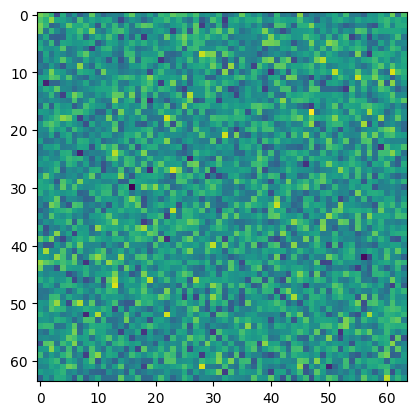

In [229]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")
# print(f"Test image\n: {test_image}")

plt.imshow(test_image[0])

In [230]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [231]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=2,
                       padding=0)

In [232]:
test_image.shape

torch.Size([3, 64, 64])

In [233]:
conv_output = conv_layer(test_image)

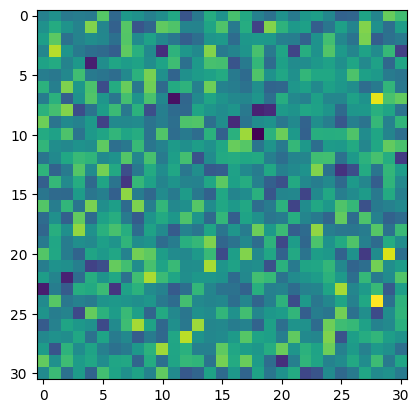

In [234]:
plt.imshow(conv_output[0].detach().numpy())

In [235]:
conv_output.shape

torch.Size([10, 31, 31])

#### Stepping through ReLU

In [236]:
# relu_output = nn.ReLU(conv_output)

In [237]:
# relu_output #this does not work, why?

#### Stepping through nn.MaxPool2d()

In [238]:
test_image.shape

torch.Size([3, 64, 64])

In [239]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
conv_output = conv_layer(test_image)
max_pool_output = max_pool_layer(conv_output)
conv_output.shape, max_pool_output.shape

(torch.Size([10, 31, 31]), torch.Size([10, 15, 15]))

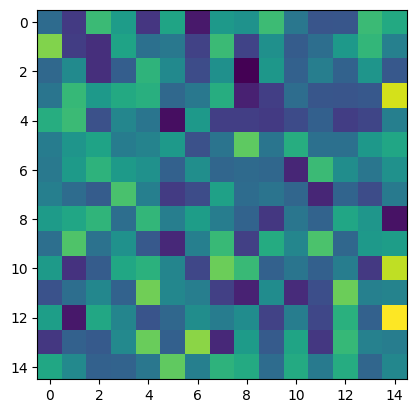

In [240]:
plt.imshow(max_pool_output[0].detach().numpy())

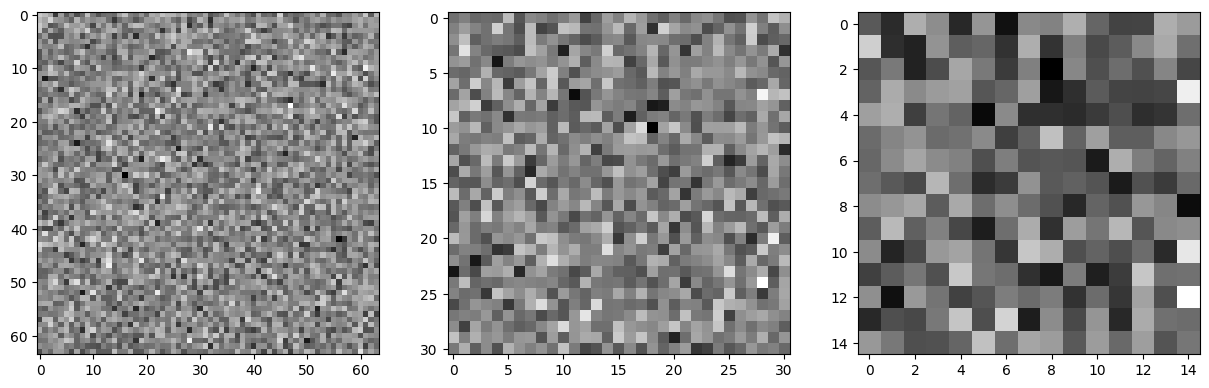

In [241]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(test_image[0], cmap='gray');
ax2.imshow(conv_output[0].detach().numpy(), cmap='gray');
ax3.imshow(max_pool_output[0].detach().numpy(), cmap='gray');

#### Figuring out intermediate fan in and fan out numbers by doing a forward pass

In [242]:
rand_image_tensor = torch.randn(size=(1,28,28))

In [243]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0425, -0.0984,  0.0621, -0.0358,  0.0184,  0.0271,  0.0163,  0.0133,
         -0.0038, -0.0115]], device='cuda:0', grad_fn=<AddmmBackward0>)

#### Creating the Loss function, Optimizer and Accuracy Function

In [244]:
# Accuracy function
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [245]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.1)

#### Creating the Train Step and Test Step functions

In [246]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
       
    train_loss = 0
    train_acc = 0
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        #forward pass
        y_pred = model(X)
        #loss
        loss = loss_fn(y_pred, y)
        train_loss += loss #loss accumulates over the batch
        acc = accuracy_fn(y_true = y,
                          y_pred = y_pred.argmax(dim=1)) #logits to prediction labels
        train_acc += acc
        #optimizer zero grad 
        optimizer.zero_grad() #happens per batch
        #backpropagation
        loss.backward() #happens per batch
        #optimizer step
        optimizer.step() #happens per batch


    # Divide total train loss by length of train_dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [247]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    
    test_loss, test_acc = 0,0
    model.eval()
    
    with torch.inference_mode():
        for X_test,y_test in data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_pred = model(X_test)
            test_loss += loss_fn(test_pred, y_test)
            
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

#### Training the model

In [248]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 3
for epoch in range(epochs):
    print(f"Epoch {epoch}\n-----------")
    train_step(model_2,
               train_dataloader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device)
    test_step(model_2,
              test_dataloader,
              loss_fn,
              accuracy_fn,
              device)

Epoch 0
-----------
Train loss: 0.58870 | Train acc: 78.67%
Test loss: 0.39646 | Test acc: 85.85%
Epoch 1
-----------
Train loss: 0.35891 | Train acc: 87.01%
Test loss: 0.36952 | Test acc: 86.74%
Epoch 2
-----------
Train loss: 0.32525 | Train acc: 88.26%
Test loss: 0.34592 | Test acc: 87.51%


#### Evaluating model performance

In [371]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X,y,model = X.to(device), y.to(device), model.to(device)
            y_pred = model(X).to(device)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
        
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"Model_name": model.__class__.__name__,
            "Model_loss": loss.item(),
            "Model_acc": acc}

model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_2_results

{'Model_name': 'FashionMNISTModelV2',
 'Model_loss': 0.3453958034515381,
 'Model_acc': 87.53993610223642}

#### Make and evaluate random predictions with model

In [372]:
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs) #converts to a 1D vector

In [373]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=100):
    test_samples.append(sample)
    test_labels.append(label)
    
# test_samples[0].shape

In [374]:
# plt.imshow(test_samples[0].squeeze(), cmap="gray");
# plt.title(class_names[test_labels[0]]);

In [375]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_labels = [item for item in pred_probs.argmax(dim=1).tolist()]
pred_classes = [class_names[item] for item in pred_probs.argmax(dim=1).tolist()]
# pred_classes

84.0


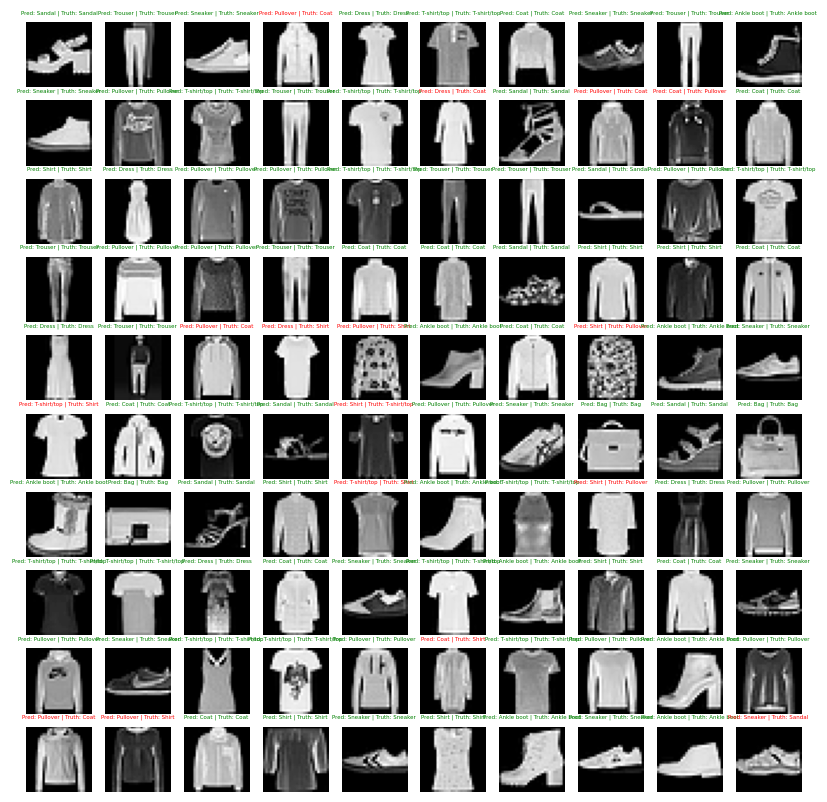

In [376]:
pred_label_list = []
truth_label_list = []

plt.figure(figsize=(10,10))
nrows=10
ncols=10
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = pred_classes[i]
    truth_label = class_names[test_labels[i]]
    
    pred_label_list.append(pred_labels[i])
    truth_label_list.append(test_labels[i])
    
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    
    if pred_label==truth_label:
        plt.title(title_text, fontsize=4, c='g')
    else:
        plt.title(title_text, fontsize=4, c='r')
        
    plt.axis('Off')

# print(truth_label_list)
# print(pred_label_list)
accuracy = accuracy_fn(y_true=torch.Tensor(truth_label_list),
                       y_pred=torch.Tensor(pred_label_list))
print(accuracy)

#### Creating a confusion matrix

In [377]:
# Read up on the Torchmetrics and MLxtend libraries

In [387]:
import mlxtend

In [426]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
for X,y in test_dataloader:
    print(y)

tensor([3, 9, 9, 7, 3, 2, 8, 0, 4, 1, 7, 8, 2, 8, 7, 9, 3, 0, 7, 8, 9, 5, 1, 8,
        3, 3, 4, 2, 1, 9, 5, 7])
tensor([2, 4, 9, 9, 4, 0, 3, 2, 0, 5, 2, 7, 4, 1, 8, 9, 3, 6, 2, 1, 9, 5, 7, 9,
        0, 4, 5, 2, 1, 4, 0, 7])
tensor([3, 4, 6, 4, 3, 5, 7, 2, 9, 6, 2, 0, 7, 1, 1, 1, 7, 2, 7, 7, 7, 9, 7, 1,
        7, 7, 7, 9, 0, 2, 1, 7])
tensor([6, 0, 6, 3, 5, 9, 5, 0, 3, 4, 8, 1, 1, 7, 1, 2, 8, 7, 5, 4, 1, 7, 0, 2,
        1, 9, 9, 3, 9, 9, 2, 4])
tensor([1, 9, 2, 1, 6, 3, 0, 5, 5, 0, 6, 5, 5, 8, 4, 2, 2, 9, 3, 5, 6, 3, 4, 4,
        8, 1, 3, 9, 2, 3, 7, 9])
tensor([1, 5, 5, 7, 0, 2, 3, 5, 6, 5, 7, 7, 9, 1, 7, 6, 2, 9, 4, 1, 7, 3, 0, 9,
        0, 1, 4, 1, 9, 0, 7, 0])
tensor([1, 0, 7, 9, 8, 5, 5, 0, 3, 2, 3, 3, 9, 6, 1, 6, 5, 8, 8, 3, 7, 0, 6, 7,
        8, 9, 1, 4, 1, 2, 8, 1])
tensor([2, 2, 8, 8, 8, 5, 8, 9, 1, 7, 3, 4, 7, 4, 6, 6, 4, 5, 0, 5, 5, 4, 6, 3,
        5, 4, 1, 9, 1, 7, 5, 9])
tensor([4, 7, 8, 0, 5, 6, 7, 1, 6, 1, 7, 8, 3, 9, 3, 7, 1, 7, 0, 0, 5, 3, 9, 4,
        3, 9, 0,

In [441]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from tqdm.auto import tqdm

y_preds = []
y_tests = []

model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Making predictions..."):
        X, y= X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
#         print(y_pred)
        y_preds.append(y_pred.cpu())
        y_tests.append(y.cpu())
#         print(y_preds)
# print(y_preds)

y_pred_tensor = torch.cat(y_preds)
y_test_tensor = torch.cat(y_tests)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([4, 8, 6,  ..., 2, 6, 1])

In [442]:
for X, y in test_dataloader:
    print(y)

tensor([3, 6, 8, 5, 9, 5, 1, 3, 1, 5, 7, 3, 7, 6, 5, 1, 5, 5, 9, 9, 1, 1, 3, 2,
        2, 6, 4, 8, 2, 4, 6, 2])
tensor([1, 6, 5, 6, 8, 2, 3, 1, 5, 8, 6, 5, 9, 4, 7, 4, 7, 2, 8, 5, 5, 9, 8, 5,
        9, 5, 1, 2, 4, 0, 4, 3])
tensor([3, 9, 9, 5, 9, 6, 4, 6, 6, 4, 9, 3, 6, 3, 0, 9, 0, 5, 7, 6, 2, 1, 4, 7,
        2, 9, 0, 6, 3, 3, 3, 5])
tensor([8, 5, 9, 8, 7, 6, 8, 3, 0, 8, 5, 6, 0, 7, 9, 1, 2, 6, 7, 5, 9, 0, 1, 7,
        6, 0, 3, 3, 4, 6, 3, 3])
tensor([8, 4, 7, 8, 8, 7, 7, 8, 1, 2, 6, 0, 2, 4, 4, 3, 1, 3, 1, 5, 8, 0, 0, 0,
        2, 3, 6, 9, 0, 3, 6, 2])
tensor([8, 4, 9, 4, 5, 7, 5, 1, 7, 2, 3, 0, 4, 4, 3, 0, 0, 1, 3, 2, 6, 3, 7, 6,
        0, 1, 1, 9, 0, 3, 9, 0])
tensor([6, 1, 2, 1, 8, 2, 4, 9, 9, 3, 7, 6, 6, 7, 0, 5, 4, 6, 1, 8, 3, 7, 6, 8,
        2, 0, 9, 2, 6, 0, 7, 2])
tensor([2, 4, 3, 3, 8, 6, 4, 8, 1, 0, 7, 5, 6, 5, 2, 5, 8, 0, 3, 0, 0, 3, 1, 2,
        7, 7, 3, 4, 6, 0, 9, 9])
tensor([0, 1, 5, 2, 1, 8, 4, 5, 5, 7, 9, 2, 4, 3, 2, 6, 8, 7, 8, 9, 9, 9, 8, 2,
        0, 2, 6,

#### Test data loader is always shuffled, how is this guy getting the confusion matrix with dataloader in evaluation and test data in testing?

There seems to be an error in the tutorial code. We need to create a list of true labels in the dataloader as well because the lables in the test_data object are in a different order (as dataloader has them shuffled)

In [445]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = y_test_tensor)

In [446]:
confmat_tensor

tensor([[546,   6,  44,  67,  11,   1, 317,   0,   8,   0],
        [  4, 811,   4, 148,  24,   0,   8,   0,   1,   0],
        [  5,   5, 792,  10, 123,   0,  55,   0,   9,   1],
        [ 21,  16,  35, 824,  57,   0,  45,   0,   1,   1],
        [  0,   4, 125,  30, 777,   0,  58,   0,   6,   0],
        [  1,   2,   3,  16,   1, 803,   2, 100,  41,  31],
        [ 54,  10, 145,  41, 166,   1, 569,   0,  14,   0],
        [  0,   3,   0,   0,   0,  18,   0, 946,  11,  22],
        [  5,   6,  24,  16,  23,   1,  23,   5, 896,   1],
        [  0,   1,   1,   1,   0,  26,   1, 102,  11, 857]])

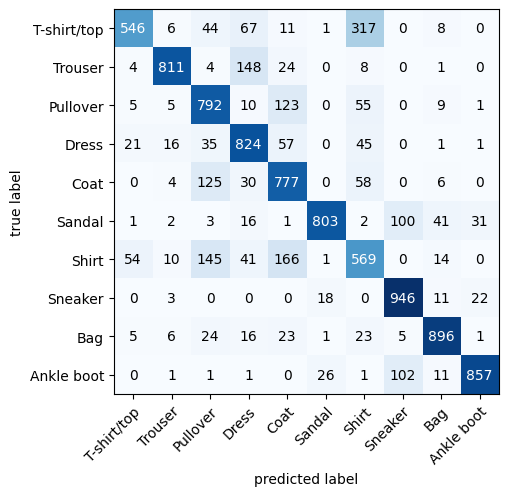

In [448]:
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize = (7,5))